# Project Proposal

In [ ]:
!pip install pandas
!pip install numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('online_shoppers_preprocessed.csv')
df.head()

,num__Administrative,num__Administrative_Duration,num__Informational,num__Informational_Duration,num__ProductRelated,num__ProductRelated_Duration,num__BounceRates,num__ExitRates,num__PageValues,num__SpecialDay,...,num__Browser,num__Region,num__TrafficType,num__Month_sin,num__Month_cos,cat__VisitorType_New_Visitor,cat__VisitorType_Other,cat__VisitorType_Returning_Visitor,bool__Weekend,Revenue
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,-0.794017,-0.896370,-0.765321,1.288827,0.552717,0.0,0.0,1.0,0.0,0
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,...,-0.209237,-0.896370,-0.516347,1.288827,0.552717,0.0,0.0,1.0,0.0,0
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,-0.794017,2.433853,-0.267374,1.288827,0.552717,0.0,0.0,1.0,0.0,0
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,...,-0.209237,-0.480092,-0.018400,1.288827,0.552717,0.0,0.0,1.0,0.0,0
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,...,0.375543,-0.896370,-0.018400,1.288827,0.552717,0.0,0.0,1.0,1.0,0


## Question 1

 What attributes are the most relevant for classifying whether a shopper makes a purchase?

## Question 2

Based on the features in the dataset, will a user make a purchase?


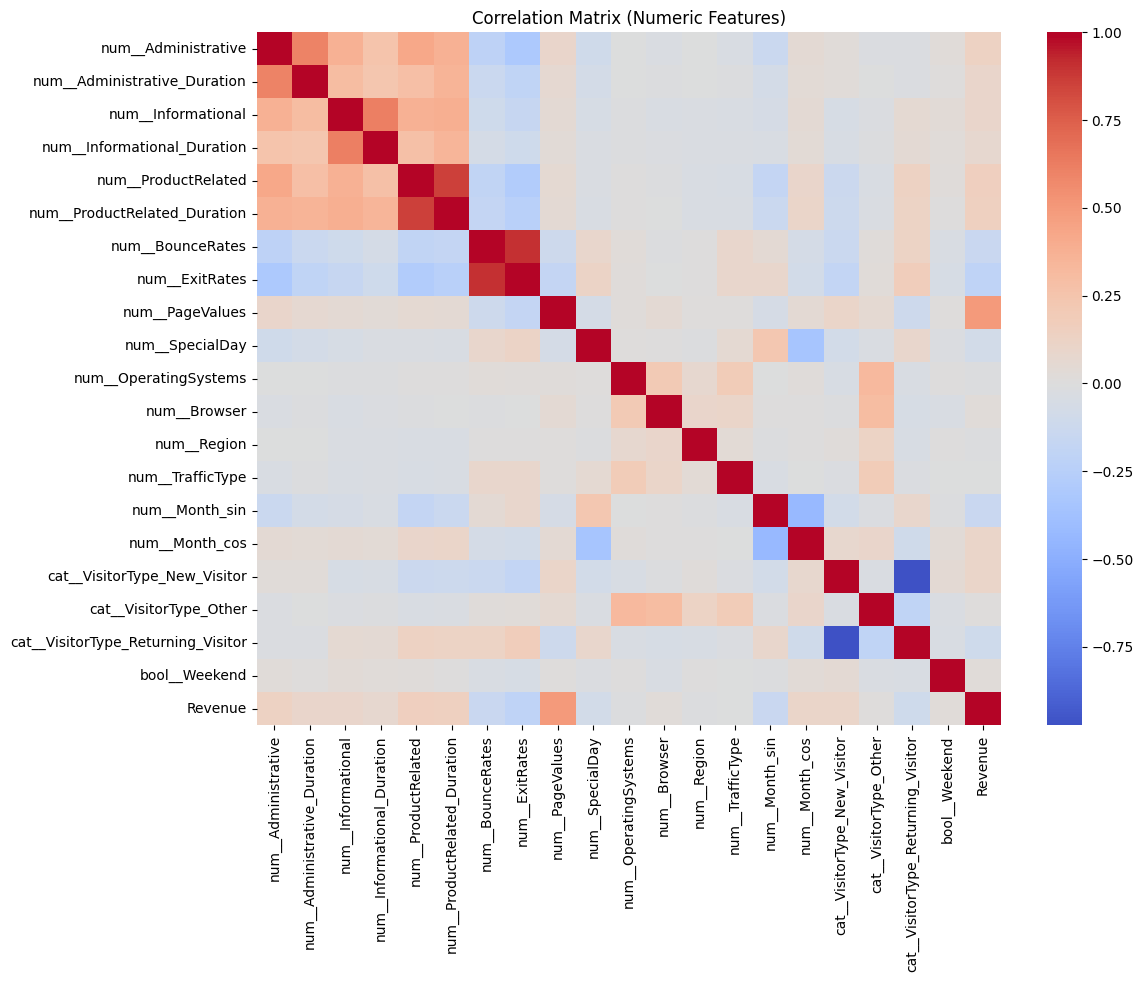

In [ ]:
target = "Revenue"

# Compute correlation matrix (numeric features only)
corr = df.corr(numeric_only=True)

# Visualize the full correlation heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot= False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

/tmp/ipython-input-1882818330.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")


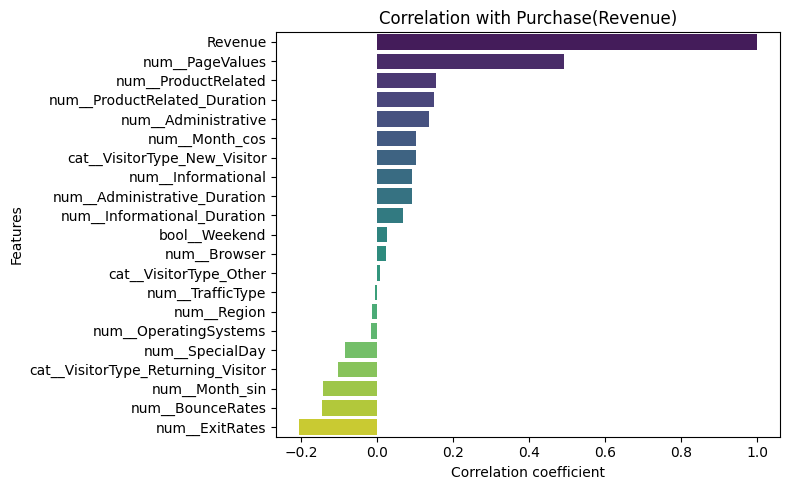

In [ ]:
# Focus on correlation with the target variable

corr_target = corr[target].sort_values(ascending=False)

plt.figure(figsize = (8,5))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")
plt.title("Correlation with Purchase(Revenue)")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
print("Top positively correlated features:\n", corr_target.head(5), "\n")
print("Top negatively correlated features:\n", corr_target.tail(5))

Top positively correlated features:
 Revenue                         1.000000
num__PageValues                 0.491894
num__ProductRelated             0.156042
num__ProductRelated_Duration    0.150077
num__Administrative             0.136330
Name: Revenue, dtype: float64 

Top negatively correlated features:
 num__SpecialDay                      -0.083601
cat__VisitorType_Returning_Visitor   -0.102847
num__Month_sin                       -0.140950
num__BounceRates                     -0.145091
num__ExitRates                       -0.204320
Name: Revenue, dtype: float64


/tmp/ipython-input-494569080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Revenue", y="num__PageValues", palette="pastel")


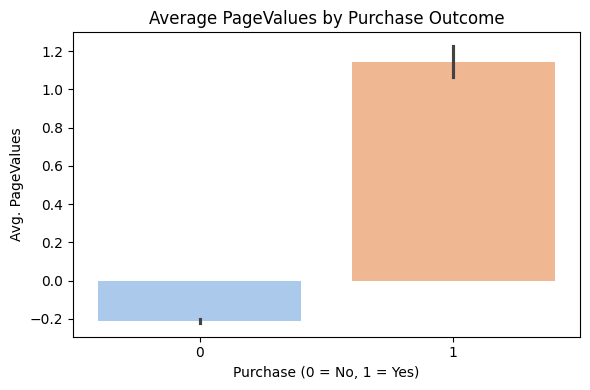

In [ ]:
# Average PageValues by Purchase
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Revenue", y="num__PageValues", palette="pastel")
plt.title("Average PageValues by Purchase Outcome")
plt.xlabel("Purchase (0 = No, 1 = Yes)")
plt.ylabel("Avg. PageValues")
plt.tight_layout()
plt.show()

# Decision Tree

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score


df = pd.read_csv('online_shoppers_preprocessed.csv')
df.head()

,num__Administrative,num__Administrative_Duration,num__Informational,num__Informational_Duration,num__ProductRelated,num__ProductRelated_Duration,num__BounceRates,num__ExitRates,num__PageValues,num__SpecialDay,...,num__Browser,num__Region,num__TrafficType,num__Month_sin,num__Month_cos,cat__VisitorType_New_Visitor,cat__VisitorType_Other,cat__VisitorType_Returning_Visitor,bool__Weekend,Revenue
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,-0.794017,-0.896370,-0.765321,1.288827,0.552717,0.0,0.0,1.0,0.0,0
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,...,-0.209237,-0.896370,-0.516347,1.288827,0.552717,0.0,0.0,1.0,0.0,0
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,-0.794017,2.433853,-0.267374,1.288827,0.552717,0.0,0.0,1.0,0.0,0
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,...,-0.209237,-0.480092,-0.018400,1.288827,0.552717,0.0,0.0,1.0,0.0,0
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,...,0.375543,-0.896370,-0.018400,1.288827,0.552717,0.0,0.0,1.0,1.0,0



--- Model Evaluation (on Test Set) ---
Accuracy: 0.9014
                 precision    recall  f1-score   support

No Purchase (0)       0.93      0.96      0.94      2575
   Purchase (1)       0.73      0.58      0.65       477

       accuracy                           0.90      3052
      macro avg       0.83      0.77      0.80      3052
   weighted avg       0.90      0.90      0.90      3052

----------------------------------------

Success! Tree visualization saved as decision_tree_visualization.png.
You can see the plot in the output and download the file from the Colab sidebar.


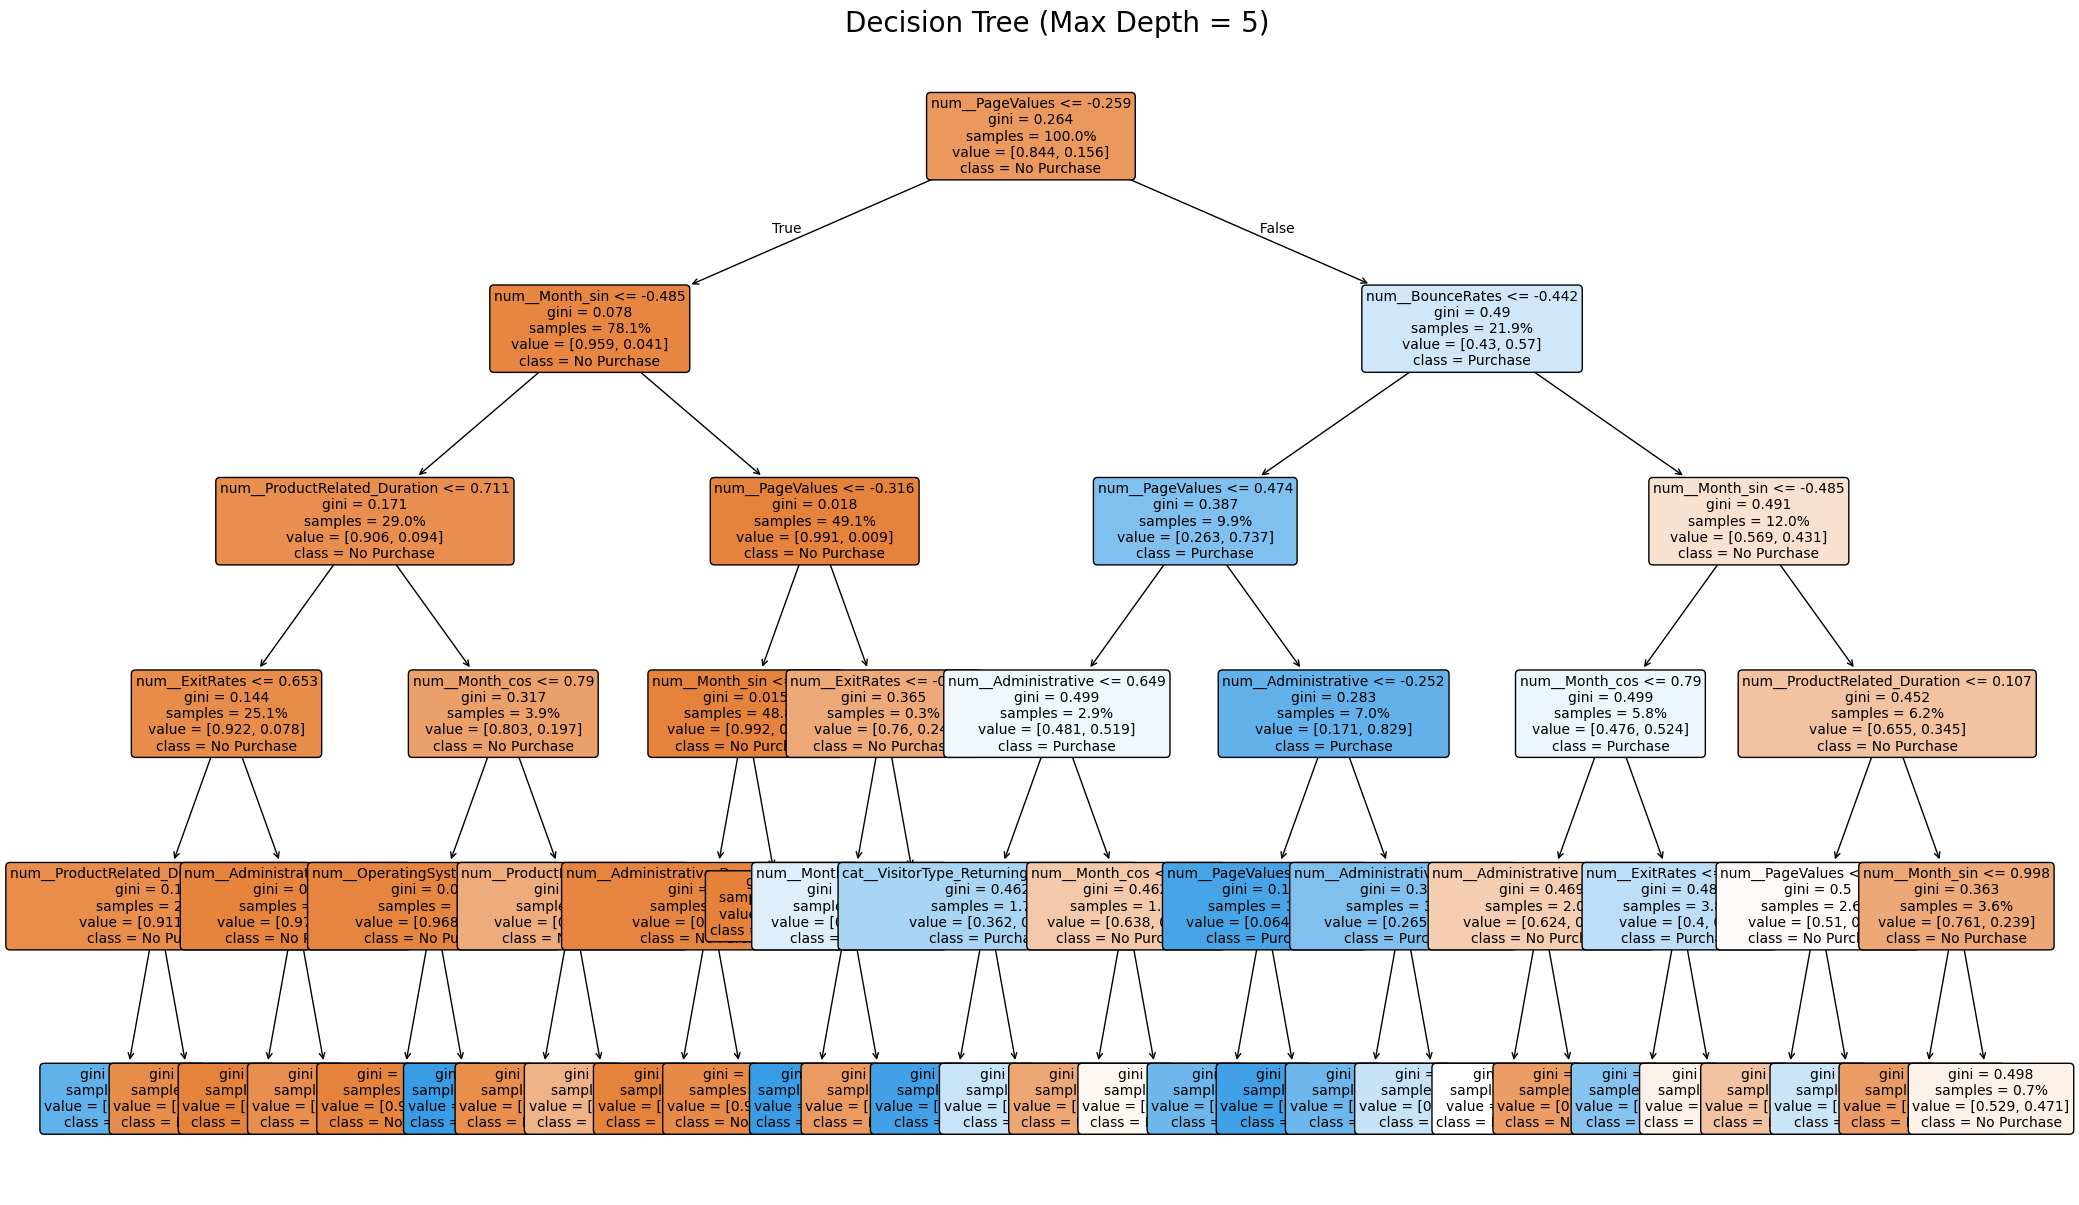

In [ ]:
# 3. Separate Features (X) and Target (y)
y = df['Revenue']
X = df.drop('Revenue', axis=1)
feature_names = X.columns.tolist()

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# 5. Initialize and Train the Model
clf = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
)
clf.fit(X_train, y_train)

# 6. Evaluate the Model
y_pred = clf.predict(X_test)
print("\n--- Model Evaluation (on Test Set) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['No Purchase (0)', 'Purchase (1)']))
print("----------------------------------------")

# 7. Visualize and Save the Tree
plt.figure(figsize=(25, 15))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=['No Purchase', 'Purchase'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10
)
plt.title(f"Decision Tree (Max Depth = {5})", fontsize=20)
plt.savefig('decision_tree_visualization.png', bbox_inches='tight')

print(f"\nSuccess! Tree visualization saved as decision_tree_visualization.png.")
print("You can see the plot in the output and download the file from the Colab sidebar.")

# Display the plot in Colab
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# --- Configuration ---
TARGET_VARIABLE = 'Revenue'
TEST_SET_SIZE = 0.3
RANDOM_SEED = 42
# ---------------------

# 2. Load Data
df = pd.read_csv('online_shoppers_preprocessed.csv')

# 3. Separate Features (X) and Target (y)
y = df[TARGET_VARIABLE]
X = df.drop(TARGET_VARIABLE, axis=1)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SET_SIZE,
    random_state=RANDOM_SEED,
    stratify=y
)

# 5. Scale data (for SVM)
# SVMs are sensitive to feature scales, so we scale the data.
print("\nScaling data for SVM...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. SVM Model
print("\nTraining Support Vector Machine (SVM)...")
# Use a basic SVC. 'kernel="rbf"' is default.
svm_clf = SVC(random_state=RANDOM_SEED, class_weight='balanced')

# Fit on SCALED data for performance
svm_clf.fit(X_train_scaled, y_train)
print("SVM training complete.")

# 7. Evaluate SVM
y_pred_svm = svm_clf.predict(X_test_scaled)
print("\n--- SVM Evaluation (on Test Set) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm, target_names=['No Purchase (0)', 'Purchase (1)']))
print("----------------------------------------")



Scaling data for SVM...

Training Support Vector Machine (SVM)...
SVM training complete.

--- SVM Evaluation (on Test Set) ---
Accuracy: 0.8626
                 precision    recall  f1-score   support

No Purchase (0)       0.95      0.89      0.92      3090
   Purchase (1)       0.54      0.74      0.63       572

       accuracy                           0.86      3662
      macro avg       0.75      0.81      0.77      3662
   weighted avg       0.89      0.86      0.87      3662

----------------------------------------


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# --- Configuration ---
TARGET_VARIABLE = 'Revenue'
TEST_SET_SIZE = 0.25  # Using 0.25 to align with Decision Tree split
RANDOM_SEED = 42
# ---------------------

# 2. Load Data (assuming df is already loaded or re-load if necessary for a fresh start)
try:
    df
except NameError:
    df = pd.read_csv('online_shoppers_preprocessed.csv')

# 3. Separate Features (X) and Target (y)
y = df[TARGET_VARIABLE]
X = df.drop(TARGET_VARIABLE, axis=1)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SET_SIZE,
    random_state=RANDOM_SEED,
    stratify=y
)

# 5. Scale data (important for KNN)
print("\nScaling data for KNN...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Initialize and Train the KNN Model
print("\nTraining K-Nearest Neighbor (KNN) classifier...")
# You can choose the number of neighbors (n_neighbors)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit on SCALED data
knn_clf.fit(X_train_scaled, y_train)
print("KNN training complete.")

# 7. Evaluate the Model
y_pred_knn = knn_clf.predict(X_test_scaled)
print("\n--- KNN Model Evaluation (on Test Set) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn, target_names=['No Purchase (0)', 'Purchase (1)']))
print("----------------------------------------")



Scaling data for KNN...

Training K-Nearest Neighbor (KNN) classifier...
KNN training complete.

--- KNN Model Evaluation (on Test Set) ---
Accuracy: 0.8781
                 precision    recall  f1-score   support

No Purchase (0)       0.90      0.97      0.93      2575
   Purchase (1)       0.70      0.39      0.50       477

       accuracy                           0.88      3052
      macro avg       0.80      0.68      0.71      3052
   weighted avg       0.86      0.88      0.86      3052

----------------------------------------


# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined from previous steps
# If not, uncomment and run the data loading and splitting cells above.

# --- Configuration (using existing ones) ---
TARGET_VARIABLE = 'Revenue'
RANDOM_SEED = 42
# ------------------------------------------

# Ensure df is loaded if this cell is run independently
try:
    df
except NameError:
    df = pd.read_csv('online_shoppers_preprocessed.csv')

# Separate Features (X) and Target (y) if not already done
y = df[TARGET_VARIABLE]
X = df.drop(TARGET_VARIABLE, axis=1)

# Split data (re-doing to ensure consistency if run standalone)
# If running after KNN/SVM, these variables should already exist.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25, # Using 0.25 to align with Decision Tree and KNN split
    random_state=RANDOM_SEED,
    stratify=y
)

# Scale data if not already done (boosting models can benefit from scaled data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1. AdaBoost Classifier
print("\nTraining AdaBoost Classifier...")
# AdaBoost often uses a Decision Tree as its base estimator
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), # A shallow tree (stump) is common
    n_estimators=100, # Number of boosting rounds
    random_state=RANDOM_SEED
)
ada_clf.fit(X_train_scaled, y_train)
print("AdaBoost training complete.")

y_pred_ada = ada_clf.predict(X_test_scaled)
print("\n--- AdaBoost Model Evaluation (on Test Set) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(classification_report(y_test, y_pred_ada, target_names=['No Purchase (0)', 'Purchase (1)']))
print("---------------------------------------------------")


# 2. Gradient Boosting Classifier
print("\nTraining Gradient Boosting Classifier...")
gbc_clf = GradientBoostingClassifier(
    n_estimators=100, # Number of boosting stages
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    max_depth=3, # Maximum depth of the individual regression estimators
    random_state=RANDOM_SEED
)
gbc_clf.fit(X_train_scaled, y_train)
print("Gradient Boosting training complete.")

y_pred_gbc = gbc_clf.predict(X_test_scaled)
print("\n--- Gradient Boosting Model Evaluation (on Test Set) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbc):.4f}")
print(classification_report(y_test, y_pred_gbc, target_names=['No Purchase (0)', 'Purchase (1)']))
print("----------------------------------------------------------")



Training AdaBoost Classifier...
AdaBoost training complete.

--- AdaBoost Model Evaluation (on Test Set) ---
Accuracy: 0.8942
                 precision    recall  f1-score   support

No Purchase (0)       0.93      0.95      0.94      2575
   Purchase (1)       0.69      0.60      0.64       477

       accuracy                           0.89      3052
      macro avg       0.81      0.77      0.79      3052
   weighted avg       0.89      0.89      0.89      3052

---------------------------------------------------

Training Gradient Boosting Classifier...
Gradient Boosting training complete.

--- Gradient Boosting Model Evaluation (on Test Set) ---
Accuracy: 0.9017
                 precision    recall  f1-score   support

No Purchase (0)       0.93      0.96      0.94      2575
   Purchase (1)       0.73      0.60      0.65       477

       accuracy                           0.90      3052
      macro avg       0.83      0.78      0.80      3052
   weighted avg       0.90      0.9

## Question 3
 How does proximity to a "special day" influence purchase intention? What about weekends? Are certain months better than others for purchasing?
